In [1]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 188 kB 8.7 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 


In [2]:
from fastai.text.all import *

In [3]:
import torch
import torch.nn as nn

In [4]:
import os
os.chdir('/content/drive/MyDrive/Text Classification')

In [5]:
#! unzip archive\ \(1\).zip

In [6]:
! ls

CNN.ipynb	     Corona_NLP_train.csv  models	 ULMfit.ipynb
Corona_NLP_test.csv  LSTM.ipynb		   RoBert.ipynb


In [7]:
import chardet
with open('Corona_NLP_test.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.99, 'encoding': 'utf-8', 'language': ''}

In [8]:
import pandas as pd


In [9]:
train_data=pd.read_csv('Corona_NLP_train.csv',encoding='ISO-8859-1')
test_data=pd.read_csv('Corona_NLP_test.csv')

In [10]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [11]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral


In [12]:
train_data = train_data.drop(columns = ['UserName', 'ScreenName', 'Location', 'TweetAt'])

In [13]:
train_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [14]:
train_data.reset_index(drop=True, inplace=True)
train_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
len(train_data)

41157

In [17]:
train_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


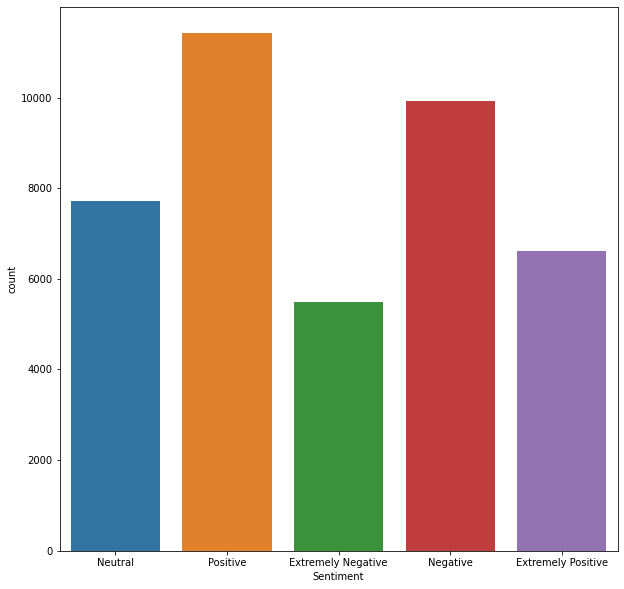

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(train_data.Sentiment)

In [24]:
dls = TextDataLoaders.from_df(train_data, valid_pct = 0.1, text_col = 'OriginalTweet', label_col = 'Sentiment', bs = 64, is_lm = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [25]:
dls.show_batch()

,text,text_
0,"xxbos xxup xxunk : xxmaj transport service for medical and health workers , law enforcers , gov't employees , supermarket , drugstore , restaurant , bank , and xxup bpo employees . \r\r\n\r\r\n xxmaj checkâ https : / / t.co / xxunk for updates and more transport services ! https : / / t.co / xxunk xxbos xxup pm xxmaj modi : xxmaj no need to worry about essentials .","xxup xxunk : xxmaj transport service for medical and health workers , law enforcers , gov't employees , supermarket , drugstore , restaurant , bank , and xxup bpo employees . \r\r\n\r\r\n xxmaj checkâ https : / / t.co / xxunk for updates and more transport services ! https : / / t.co / xxunk xxbos xxup pm xxmaj modi : xxmaj no need to worry about essentials . xxmaj"
1,t.co / xxunk xxbos all this # coronavirus we need to stop panic buying so the old and the people that are still working get food xxbos xxmaj with oil prices stuck in the 20s xxmaj chevron cuts more than 8 billion from its budget xxbos ? ? stop xxmaj panic xxmaj buying and xxmaj hoarding ? ? \r\r\n xxmaj run - on the grocery store seems to be the new xxunk,/ xxunk xxbos all this # coronavirus we need to stop panic buying so the old and the people that are still working get food xxbos xxmaj with oil prices stuck in the 20s xxmaj chevron cuts more than 8 billion from its budget xxbos ? ? stop xxmaj panic xxmaj buying and xxmaj hoarding ? ? \r\r\n xxmaj run - on the grocery store seems to be the new xxunk in
2,": / / t.co / xxunk # totalsocial # consumerconversations # consumerinsights xxbos # xxup covid19 # stayathome # song # eastermonday # coronavirus # xxunk # radio # toiletpaper wonderful xxmaj corona xxmaj virus xxunk written on toilet paper ? xxunk https : / / t.co / xxunk xxbos "" purpose helps establish and reinforce a real , meaningful connection between a brand and a consumer . # xxunk helps reinforce","/ / t.co / xxunk # totalsocial # consumerconversations # consumerinsights xxbos # xxup covid19 # stayathome # song # eastermonday # coronavirus # xxunk # radio # toiletpaper wonderful xxmaj corona xxmaj virus xxunk written on toilet paper ? xxunk https : / / t.co / xxunk xxbos "" purpose helps establish and reinforce a real , meaningful connection between a brand and a consumer . # xxunk helps reinforce this"
3,i couldnât believe my eyes when i saw that the alcohol section was bare too ! xxmaj what the hell ? ! ? ? # coronacrisis xxbos q xxmaj had groceries delivered from supermarket should i wash the food containers a xxmaj dr williams of says no evidence is being spread that way but you can wash hands after handling to lower risk more xxbos xxmaj portland xxmaj chefs xxmaj help xxmaj,couldnât believe my eyes when i saw that the alcohol section was bare too ! xxmaj what the hell ? ! ? ? # coronacrisis xxbos q xxmaj had groceries delivered from supermarket should i wash the food containers a xxmaj dr williams of says no evidence is being spread that way but you can wash hands after handling to lower risk more xxbos xxmaj portland xxmaj chefs xxmaj help xxmaj feed
4,". \r\r\n\r\r\n https : / / t.co / xxunk xxbos i was deemed an # essentialworker at a medical service in # xxmaj florida & & xxmaj i 've gone from taking lunch to work to taking xxunk , gloves and homemade hand sanitizer ( we 're almost out ) . xxmaj we need a distribution system to prioritize essential businesses getting supplies . \r\r\n\r\r\n▁ # coronavirus https : / / t.co","\r\r\n\r\r\n https : / / t.co / xxunk xxbos i was deemed an # essentialworker at a medical service in # xxmaj florida & & xxmaj i 've gone from taking lunch to work to taking xxunk , gloves and homemade hand sanitizer ( we 're almost out ) . xxmaj we need a distribution system to prioritize essential businesses getting supplies . \r\r\n\r\r\n▁ # coronavirus https : / / t.co /"
5,"# xxmaj covid_19 xxbos xxmaj if you 're healthy , stay in . xxmaj if you 're not well , stay in . xxmaj go grab some beers ( buy local - online if you can ) . xxmaj 

In [26]:
learn = language_model_learner(dls, AWD_LSTM, drop_mult = 0.3)

SuggestedLRs(valley=0.004365158267319202)

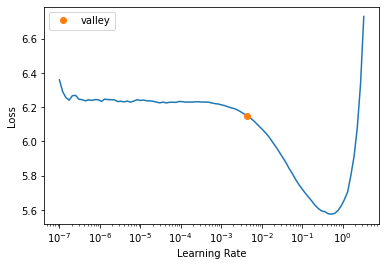

In [27]:
learn.lr_find()

In [28]:
learn.fit_one_cycle(1, lr_max = slice(1e-2, 1e-1))

epoch,train_loss,valid_loss,time
0,4.078440,3.923627,01:40


In [29]:
learn.save('fine_tuned')
learn.save_encoder('fine_tuned_enc')

In [30]:
data_class = TextDataLoaders.from_df(train_data, valid_pct = 0.1, text_col = 'OriginalTweet', label_col = 'Sentiment', bs = 64, text_vocab = dls.vocab)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [31]:
data_class.show_batch()

,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,xxbos $ xxunk a xxup look xxup at xxup the xxup weekly & & xxup monthly xxup xxunk xxrep 4 ! xxup silver xxup prices xxup set xxup to xxup rise xxup rapidly xxrep 3 ! xxup the xxup worlds xxup supply xxup is xxup on xxup halt xxup due xxup to xxup covid-19 .. xxup do nt xxup fall xxup asleep xxup during xxup this ! ! $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk xxup best xxup chart xxup in xxup the xxup otc xxup at xxup this xxup price https : / / t.co / xxunk,Extremely Positive
2,xxbos ? premium xxup offers ? \r\r\n ? ? get xxup in xxup touch xxup for xxup deals ? ? \r\r\n xxmaj over 3 xxrep 3 0 channels ? \r\r\n xxmaj over 12 xxrep 3 0 movies and series ? ? \r\r\n\r\r\n xxmaj free trials available ? \r\r\n\r\r\n ? sports \r\r\n ? movies \r\r\n ? music \r\r\n ? ppv xxup events \r\r\n ? ? kids \r\r\n ? uk / xxup usa \r\r\n ? xxunk \r\r\n ? catch xxup up \r\r\n ? xxunk \r\r\n\r\r\n xxmaj whatsapp : xxunk \r\r\n\r\r\n▁ # xxup iptv # xxmaj firestick # xxup xxunk # xxunk https : / / t.co / xxunk,Positive
3,"xxbos xxmaj hi xxunk # xxunk , \r\r\n\r\r\n xxmaj please xxmaj make xxmaj all xxmaj family xxmaj sims xxmaj unlimited xxmaj mobile xxmaj data & & xxmaj at xxmaj reasonable xxmaj affordable xxmaj prices , \r\r\n\r\r\n xxmaj just xxmaj have xxmaj different xxmaj speed xxmaj plans , \r\r\n\r\r\n xxmaj especially xxmaj with : # coronavirusuk / # coronauk / # coronavirus , \r\r\n\r\r\n xxmaj we xxmaj need xxmaj mobile # 5 g & & # 4 g & & # 3 g xxmaj more xxmaj than xxmaj ever & & xxmaj staying xxmaj in xxmaj contact :)",Positive
4,xxbos xxup xxunk xxmaj xxunk xxup xxunk 50 xxup ms brown xxup mississippi xxup prisoners xxup are xxup going xxup on xxup official xxup food amp xxup water xxup strike xxup april 9 2020 xxup to xxup protest xxup the xxup covid 19 xxup pandemic amp xxup lack xxup of xxup xxunk xxup measures xxup taken xxup by xxup xxunk xxup staff xxup shortage xxup inhumane xxup living xxup conditions xxup poor xxup food xxup quality xxup quality xxup abuse amp xxup demand xxup xxunk xxup xxunk amp xxup enact xxup sb xxunk,Extremely Negative
5,xxbos # xxunk ? \r\r\n\r\r\n xxup with xxup no xxup sports xxup in xxup our xxup lives i xxup wanna xxup provide xxup y all xxup with xxup quality xxup xxunk xxup with xxup lower xxup prices xxup than xxup retail xxup all xxup xxunk xxup now xxup are 40 $ xxup each xxup until xxup sports xxup returns xxup due xxup to # xxmaj covid_19 \r\r\n\r\r\n xxup dms xxup are xxup always xxup open xxrep 4 ! xxup hmu xxrep 3 ! https : / / t.co / xxunk,Extremely Negative
6,"xxbos xxmaj the xxmaj amazing xxmaj lowest xxmaj prices offers are here ? \r\r\n xxmaj the supermarket is available in xxmaj xxunk , xxmaj old xxmaj airport xxmaj and xxmaj al xxmaj xxunk \r\r\n ? old airport branch is open 24 / 7 ? \r\r\n xxmaj get xxup pdf here : https : / / t.co / xxunk \r\r\n\r\r\n . \r\r\n . \r\r\n▁ # xxunk # xxunk # supermarket # offer # deals # qatar # doha # covid_19 # corona # covid https : / / t.co / xxunk",Positive
7,"xxbos xxmaj hand xxmaj sanitizer xxmaj gel xxmaj alcohol xxmaj based ( 4 xxmaj pack x 8 xxmaj fl xxmaj oz / 220ml ) xxmaj infused with xxmaj alovera xxmaj gel , xxmaj jojoba xxmaj oil , xxmaj vitamin e - xxmaj xxunk xxmaj fragrance xxmaj free xxmaj sanitize for $ xxunk https : / / t.co / xxunk via @amazon \r\r\n\r\r\n▁ # xxup covid2019 # xxmaj covid_19 # xxup covid?19 # xxup covid19 # xxup covid__19 # coronavirus # facemask # corona https : / / t.co / xxunk",Extremely Positive


In [32]:
learn = text_classifier_learner(data_class, AWD_LSTM, drop_mult=0.5, metrics=[accuracy])
learn.load_encoder('fine_tuned_enc')


SuggestedLRs(valley=0.002511886414140463)

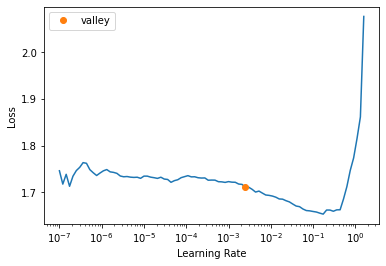

In [33]:
learn.lr_find()

In [34]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.496194,1.435609,0.358688,00:51
1,1.425383,1.370947,0.404131,00:48
2,1.427468,1.355503,0.402916,00:49
3,1.412999,1.351442,0.402187,00:49
4,1.404401,1.349585,0.403888,00:49


In [35]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.072280,0.954043,0.607533,01:01
1,0.771669,0.660118,0.757230,01:02
2,0.581679,0.548860,0.801701,01:02
3,0.463755,0.519788,0.806318,01:01
4,0.407533,0.513563,0.810936,01:01


In [36]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(k = 5)

,input,target,predicted,probability,loss
0,xxbos xxmaj we and all citizen of xxmaj india … only need two things during this lockdown … \r\r\n 1 . xxmaj food at home \r\r\n 2 . xxmaj no # financialcrisis during this emergency situation . \r\r\n xxmaj if these are xxunk then none will panic . \r\r\n▁ # 21dayslockdown # coronaviruslockdown # xxup covid2019,Positive,Extremely Negative,0.994675874710083,10.252778053283691
1,"xxbos @gregabbott_tx xxup tx should be a leader is saving their population from # xxmaj covid_19 . xxmaj i 've been in a grocery store & & no 1 is using any universal precautions or heeding warnings . xxmaj time to follow , xxup ny , xxup nj , xxup ca & & xxup ct & & order everyone home ! xxup tx healthcare ca",Extremely Positive,Negative,0.5563194155693054,8.082335472106934
2,"xxbos xxmaj i m fucking calling it now , covid-19 is nt gon na kill us , since we 're all gon na kill xxunk due to a fucking food shortage . xxmaj the panic is gon na go from a mere virus to a fucking all out apocalypse due to how shit is going right now , you 're all gon na cause a damn downfall",Negative,Extremely Negative,0.9990770816802979,7.084533214569092
3,"xxbos xxunk xxunk xxunk @justintrudeau xxunk @cpho_canada xxmaj at the rate it 's going , a senior over 70 , isolated at home , wanting to do online shopping at # xxmaj metro would have to pay $ 12 service charges and wait over a week for deli",Neutral,Extremely Negative,0.8253616690635681,6.8515825271606445
4,"xxbos xxmaj due to the xxup covid-19 situation our xxmaj xxunk , xxup tx store will be closed on xxmaj wednesday to allow for members of our staff to temporarily work from home . xxmaj the retail store will be open xxmaj monday , xxmaj tuesday , xxmaj thursday , xxmaj friday andâ ▁ https : / / t.co / xxunk",Extremely Positive,Positive,0.987204909324646,6.446069717407227


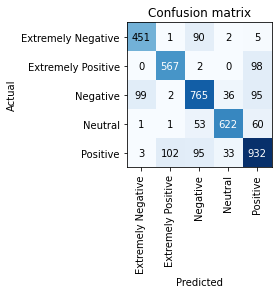

In [37]:
interp.plot_confusion_matrix()